### Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.kernel_approximation import PolynomialCountSketch

### Configurações gerais

In [2]:
# Paleta de cor
cmap = plt.cm.Set3

### Gerando dados aleatórios - Toy data

In [3]:
## Não funciona bem com esse kernel - Teste
#X, y = make_moons(n_samples=500, noise=0.08)

iris = load_iris()
X = iris.data[:, 2:] # Pegando as duas primeiras características
y = iris.target

### Plotando as amostras como pontos em um gráfico bidimensional

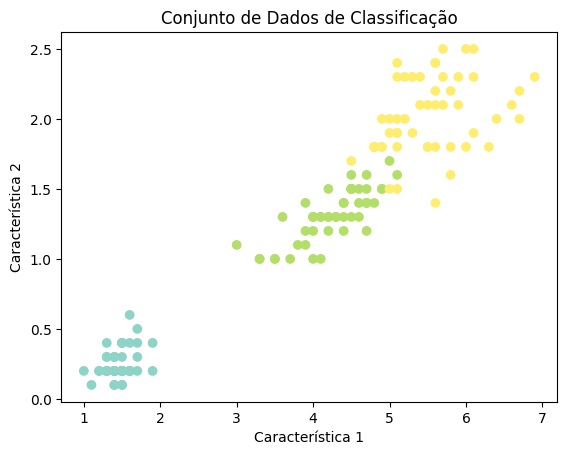

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Conjunto de Dados de Classificação')
plt.show()

### Pre-processamento

In [5]:
# Escalando os dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Kernel inhomogeneous_polynomial - NumPy

In [6]:
def inhomogeneous_polynomial_kernel(X, Y, degree=4, bias=1):
    """
    Calcula o kernel inhomogeneous polynomial entre as matrizes X e Y com grau 'degree' e bias 'bias'.
    
    Args:
    X: array-like, matriz de m amostras e n recursos.
    Y: array-like, matriz de k amostras e n recursos.
    degree: int, grau do polinômio. Padrão é 2.
    bias: float, termo de bias (interceptação). Padrão é 1.
    
    Returns:
    K: matriz de tamanho m x k contendo o resultado do kernel inhomogeneous polynomial.
    """
    return (np.dot(X, Y.T) + bias) ** degree

In [7]:
# Criando o modelo SVM com kernel inhomogeneous polynomial
kernel = SVC(kernel=inhomogeneous_polynomial_kernel)

In [8]:
# Treinando o modelo
kernel.fit(X, y)

SVC(kernel=<function inhomogeneous_polynomial_kernel at 0x7f328a49e940>)

### Visualizando fronteira de decisão

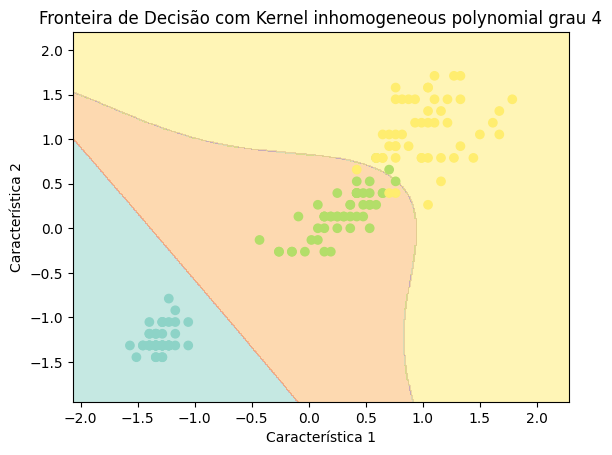

In [9]:
# Definindo os limites do gráfico
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

# Criando uma malha de pontos para avaliar a fronteira de decisão
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = kernel.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotando a fronteira de decisão e os pontos de dados
plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title(f'Fronteira de Decisão com Kernel inhomogeneous polynomial grau 4')
plt.show()